In [114]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

In [115]:
#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

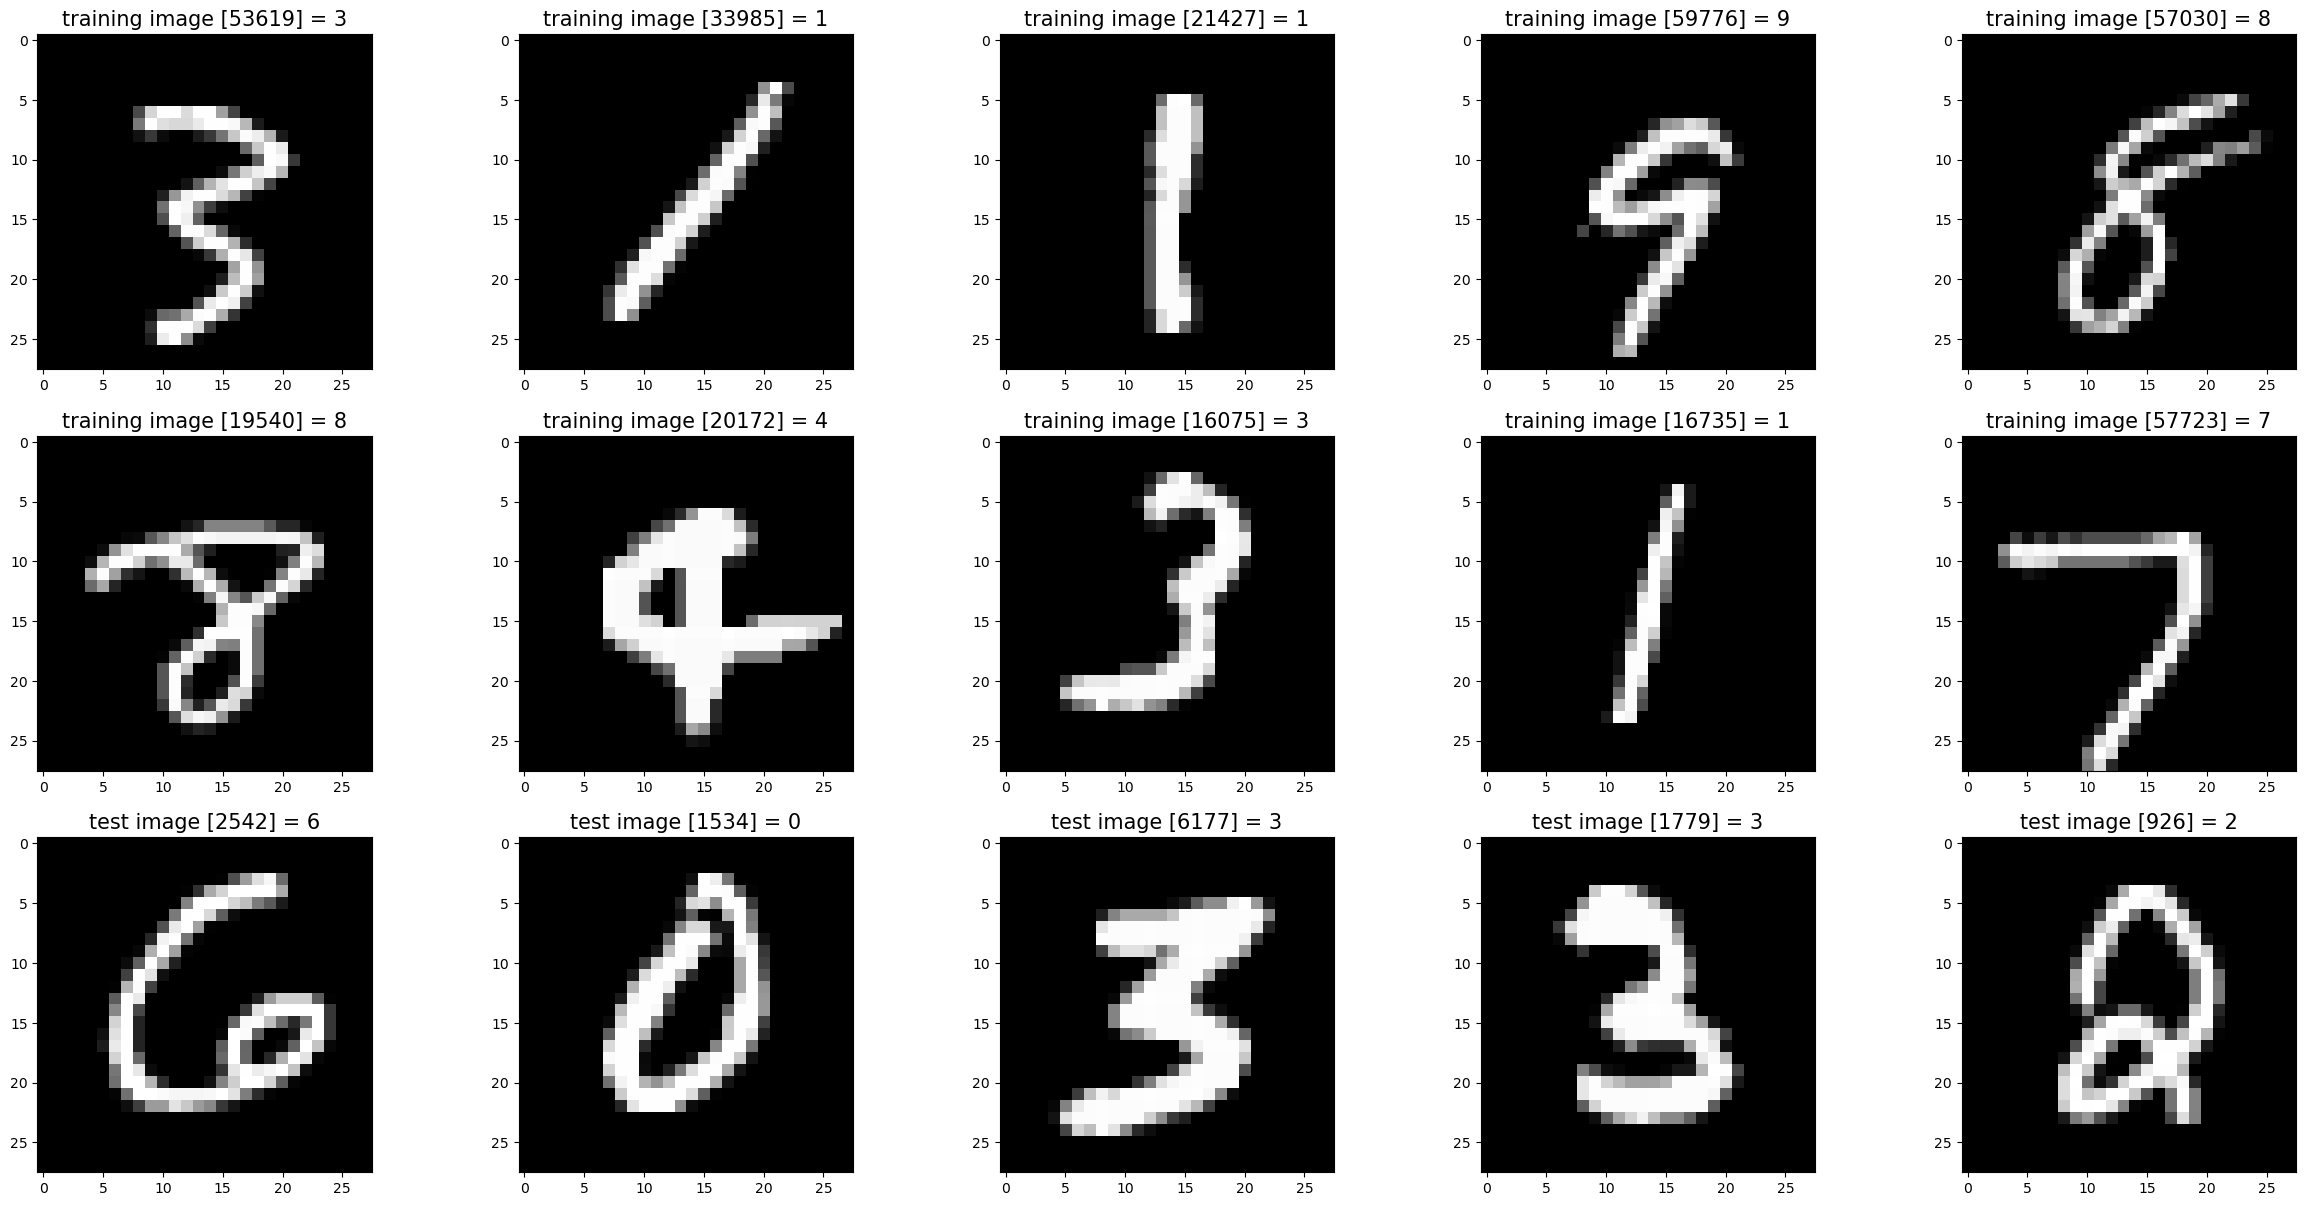

In [116]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = './archive/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [117]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input, Flatten
from keras.models import Sequential
from keras.activations import relu, linear, softmax
from keras.losses import SparseCategoricalCrossentropy, sparse_categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import *

In [118]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()  # no need to use train_test_split()

In [119]:
x_train = x_train/255
x_test = x_test/255 # normalization in range (0-1)

In [120]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


In [121]:
tf.random.set_seed(123)
model = Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='L_flatten'),
    keras.layers.Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='L1'),
    keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), name='L2'),
    keras.layers.Dense(units=10, activation='linear', name='L_out')
])

In [122]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [123]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8104 - sparse_categorical_accuracy: 0.8943 - val_loss: 0.5322 - val_sparse_categorical_accuracy: 0.9238
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5108 - sparse_categorical_accuracy: 0.9204 - val_loss: 0.4473 - val_sparse_categorical_accuracy: 0.9335
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4494 - sparse_categorical_accuracy: 0.9304 - val_loss: 0.3937 - val_sparse_categorical_accuracy: 0.9441
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4029 - sparse_categorical_accuracy: 0.9392 - val_loss: 0.3541 - val_sparse_categorical_accuracy: 0.9505
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3749 - sparse_categorical_accuracy: 0.9426 - val_loss: 0.3487 - val_sparse_categorical_accuracy: 0.9474
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3554 - spars

In [124]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L_flatten (Flatten)         (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 128)               100480    
                                                                 
 L2 (Dense)                  (None, 64)                8256      
                                                                 
 L_out (Dense)               (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [126]:
L0_num_params = 0 # flatten layer
L1_num_params = 784 * 128 + 128  # W1 parameters  + b1 parameters
L2_num_params = 128 * 64 + 64   # W2 parameters  + b2 parameters
L3_num_params = 64 * 10 + 10     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

[layer0, layer1, layer2, layer3] = model.layers

#  Weights and shapes
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

L1 params =  100480 , L2 params =  8256 ,  L3 params =  650
W1 shape = (784, 128), b1 shape = (128,)
W2 shape = (128, 64), b2 shape = (64,)
W3 shape = (64, 10), b3 shape = (10,)


In [127]:
y_pred = tf.nn.softmax(model.predict(x_test))
#print(y_pred[:9,:])
#print(y_test[:2])
#yhat = np.asarray(y_pred)
yhat = []   # list of all predictions (as final outputs (digit 0-9))
for i in range(0, len(x_test)):
    yhat.append(np.argmax(y_pred[i,:]))
print(f"First five rows of predictions in final form: {yhat[:5]}")  # first five rows just to check
#y_options = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

313/313 [==============================] - 1s 2ms/step
First five rows of predictions in final form: [7, 2, 1, 0, 4]


In [128]:
loss_v, acc_v = model.evaluate(x_test, y_test, verbose=2)
print('\"model.evaluate\" accuracy: {:5.2f}%'.format(100 * acc_v))

from sklearn.metrics import accuracy_score
sklearn_score = accuracy_score(y_test,yhat)
print(f"Sklearn accuracy score: {sklearn_score}")

def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cat_err: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(0, m):     
        if(yhat[i] != y[i]):
            err_i = 1
        elif(yhat[i] == y[i]):
            err_i = 0
        incorrect = incorrect + err_i
    cat_err = incorrect / m
    return(cat_err)

my_score = np.squeeze(eval_cat_err(y_test, yhat))
print(f"Categorization error (subset of missclassified examples): {my_score:0.3f}")
if((sklearn_score + my_score) == 1):
    print("Calculation OK.")
else:
    print("Check the scores again.")

313/313 - 1s - loss: 0.2791 - sparse_categorical_accuracy: 0.9564 - 504ms/epoch - 2ms/step
"model.evaluate" accuracy: 95.64%
Sklearn accuracy score: 0.9564
Categorization error (subset of missclassified examples): 0.044
Calculation OK.


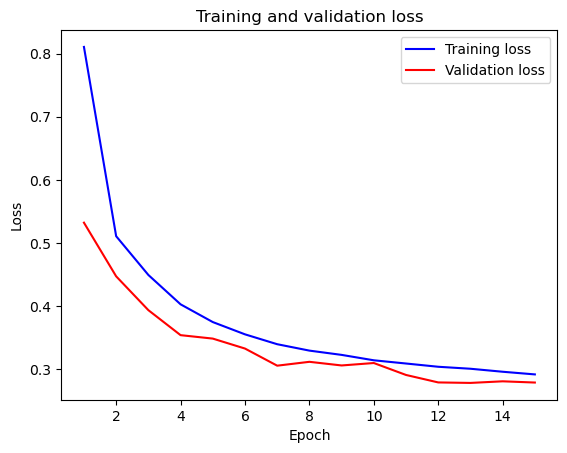

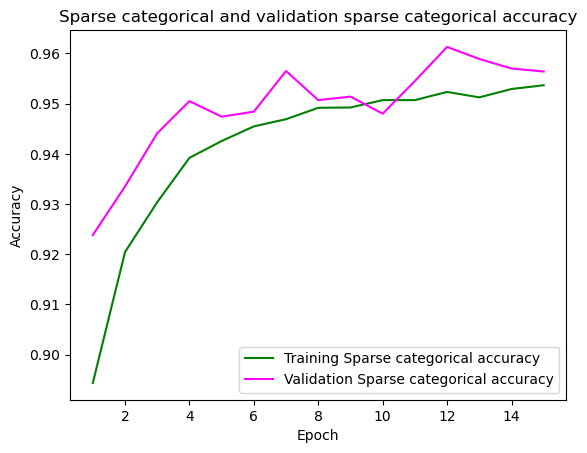

In [130]:
loss = history.history['loss']
val_loss = history.history['val_loss']
#a, b = 0, 0.25

sparse_cat_acc = history.history['sparse_categorical_accuracy']
val_sparse_cat_acc = history.history['val_sparse_categorical_accuracy']
#c, d = 0.9, 1

epochs = range(1, len(loss) + 1)   # len(val_loss) also works (they have the same length)
 
plt.plot(epochs, loss, color='blue', label='Training loss')
plt.plot(epochs, val_loss, color='red', label='Validation loss')
#plt.ylim(bottom=a)
#plt.ylim(top=b)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, sparse_cat_acc, color='green', label='Training Sparse categorical accuracy')
plt.plot(epochs, val_sparse_cat_acc, color='magenta', label='Validation Sparse categorical accuracy')
#plt.ylim(bottom=c)
#plt.ylim(top=d)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Sparse categorical and validation sparse categorical accuracy')
plt.legend()

plt.show()

In [131]:
print(f"Prediction for 11th test example: {model.predict(x_test[11].reshape(1,28,28)).argmax(axis=1)}") 
print(f"\nShape of prediction without argmax: {model.predict(x_test[11].reshape(1,28,28)).shape}")   # just as a clarification why argmax is needed
print(f"\nPrediction output without argmax{model.predict(x_test[11].reshape(1,28,28))}")
#print(f"\n{model.predict(x_test[11]).argmax}")    #  <built-in method argmax of numpy.ndarray object at 0x000001F6E91D07B0>
#print(f"\n{model.predict(x_test[11]).argmax(axis=1)}")  #  [6]

1/1 [==============================] - 0s 21ms/step
Prediction for 11th test example: [6]
1/1 [==============================] - 0s 35ms/step

Shape of prediction without argmax: (1, 10)
1/1 [==============================] - 0s 37ms/step

Prediction output without argmax[[ -4.0981164  -6.414789   -2.8544927  -6.5471377  -2.9757574  -2.670546
    2.8577378 -10.772692   -0.5957499  -5.062301 ]]


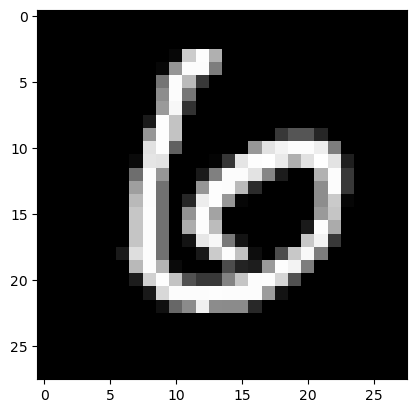

In [132]:
plt.imshow(x_test[11], cmap='grey')    # show the true value of test example number 11

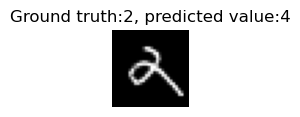

In [133]:
# how a misclassified image looks
fig = plt.figure(figsize=(1, 1))
errors = np.where(y_test != yhat)
random_index = errors[0][5]
#X_random_reshaped = x_test[random_index].reshape((28, 28)).T
X_random_reshaped = x_test[random_index]
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"Ground truth:{y_test[random_index]}, predicted value:{yhat[random_index]}")
plt.axis('off')
plt.show()

In [134]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
print(cm)
print(f"\nShape of the confusion matrix: {confusion_matrix(y_test, yhat).shape}")

[[ 954    0    0    2    0    7   10    1    2    4]
 [   0 1113    3    4    1    1    5    1    7    0]
 [  10    2  964   13    7    3   10    8   15    0]
 [   0    0    3  977    0   13    1    8    4    4]
 [   0    0    3    0  940    0    8    1    0   30]
 [   3    2    0   12    4  848    7    1    3   12]
 [   3    3    1    1    6    9  932    0    3    0]
 [   1    8   15    3    5    1    0  950    1   44]
 [   2    1    2   16   11    8    6    3  913   12]
 [   1    3    0    9   16    4    1    2    0  973]]

Shape of the confusion matrix: (10, 10)


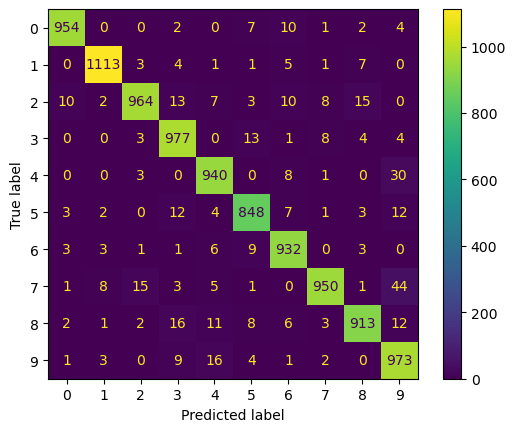

In [135]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cm_display.plot()
plt.show()

In [139]:
# Saving the entire model as a `.keras` zip archive.
model.save('my_model.keras')

# To reload a model from a keras zip archive:
#new_model = tf.keras.models.load_model('my_model.keras')